In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Since Data is in excel format so we will use pd.read_excel func to read data.

In [2]:
train = pd.read_excel("C:/Users/hp/Desktop/Dataset/Final Participant Data Folder/Final_Train.xlsx")
test = pd.read_excel("C:/Users/hp/Desktop/Dataset/Final Participant Data Folder/Final_Test.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
# checking for null values
round(train.isnull().sum()/len(train) * 100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

# Exploratory Data Analysis

Extracting Years of Experience from the Experience column and converting it to Numeric.

In [6]:
train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [7]:
train.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


As there are some missing values in Place column, I have replaced then with Unknown to represent them.

In [8]:
train.Place.fillna('Unknown,Unknown',inplace=True)

train['locality'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]


train.drop('Place',axis=1,inplace=True)

Rating has more then 50% of missing values so I will deal with it first and then convert it to int

In [9]:
train['Rating'].fillna('-99%',inplace=True)

train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [10]:
print("0-9% ",len(train[(train['Rating']>0) & (train['Rating']<10)]))
print("10-19% ",len(train[(train['Rating']>=10) & (train['Rating']<20)]))
print("20-29% ",len(train[(train['Rating']>=20) & (train['Rating']<30)]))
print("30-39% ",len(train[(train['Rating']>=30) & (train['Rating']<40)]))
print("And so-on..")

0-9%  1
10-19%  0
20-29%  0
30-39%  3
And so-on..


In [13]:
train['Rating'].value_counts().sort_index()

-99     3302
 7         1
 33        2
 36        1
 40        1
 45        1
 47        1
 48        1
 53        1
 55        2
 56        5
 57        3
 58        1
 60        7
 62        2
 63        2
 64        2
 65        1
 67       12
 68        5
 69        4
 70        4
 71        9
 72        3
 73        8
 74        7
 75        8
 76        9
 77       16
 78        6
 79       13
 80       19
 81       12
 82       23
 83       21
 84       13
 85       27
 86       21
 87       14
 88       41
 89       42
 90       66
 91       60
 92       66
 93      109
 94      115
 95      178
 96      220
 97      241
 98      290
 99      259
 100     684
Name: Rating, dtype: int64

 Working with Qualification

In [14]:
train['Qualification_count'] = train['Qualification'].apply(lambda x: len(x.split(",")))

train['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [15]:
train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

here there are lot of Qualification but most of doctors only has 1 or 2 qualification.
'MBA -Healthcare' and ‘MBA’ are mentioned differently but are same categories. So here we will take the top 10 Qualification that occurs the most.


In [16]:
train["Qualification"]=train["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [17]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [18]:
for qual in final_qual:
    train[qual] = 0

for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1

In [19]:
train.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [20]:
train.head(4)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,-99,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,-99,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0


Now I am having top 10 Qualification columns in the training set which is perfect. 

In [21]:
train['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

In [22]:
import re
train['city'] = train['city'].apply(lambda x: re.sub(' +','',str(x)))

In [23]:
train['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
nan                      1
Sector5                  1
Name: city, dtype: int64

In [24]:
train[(train['city'] == "nan") | (train['city'] == "Sector5")]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
2169,11,-99,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0
3980,23,-99,Dentist,NaN,250,e,nan,0,1,0,0,0,0,0,0,0,0


In [25]:
train['city'] = np.where(train['city']=="Sector5","Delhi", train['city'])

train['city'].loc[3980] = "Unknown"
train['locality'].loc[3980] = "Unknown"

In [26]:
train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,-99,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,-99,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [27]:
# let's see for each city how much locality data is there
train.groupby('city')['locality'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
Unknown                 1
Name: locality, dtype: int64

In [28]:
train.to_csv('data_correct.csv',index=False)

In [29]:
train.head(3)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,-99,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0


looking at the relationship of the data with respect to the target column to have a better understanding of the data

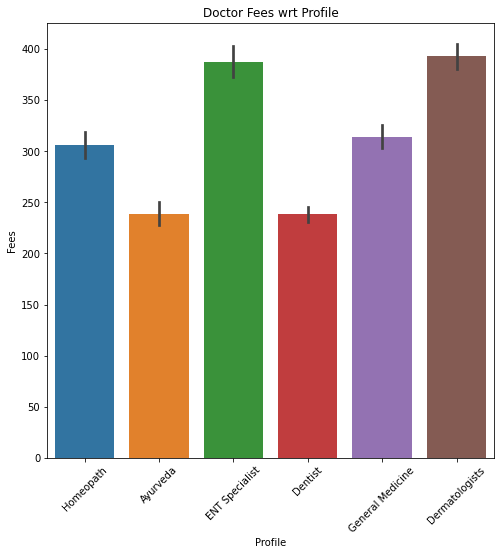

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

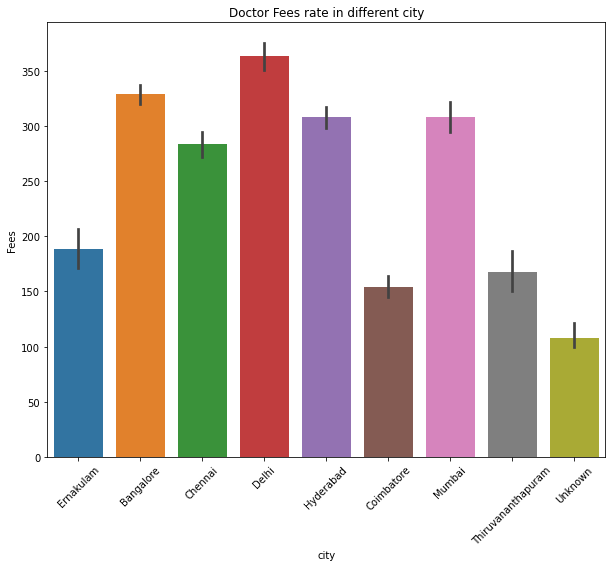

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=train)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city,  the doctor consultation fees in these cities are high as compared to other cities

Fees of doctors having a profile of ENT Specialist and Dermatologist is very high than homeopathy and general medicine

In [32]:
train = pd.get_dummies(train,columns=['city','Profile'], prefix=['city','Profile'])

In [33]:
train.head()

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12,98,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,-99,NaN,300,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,-99,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,100,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Miscellaneous_Info is messy column and it consists data which we already have like doctor address(city & locality) and Rating.
locality and city are approximate and have the same relationship so its better to move with city only.
Dropping the Miscellaneous_Info and locality

In [34]:
train.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

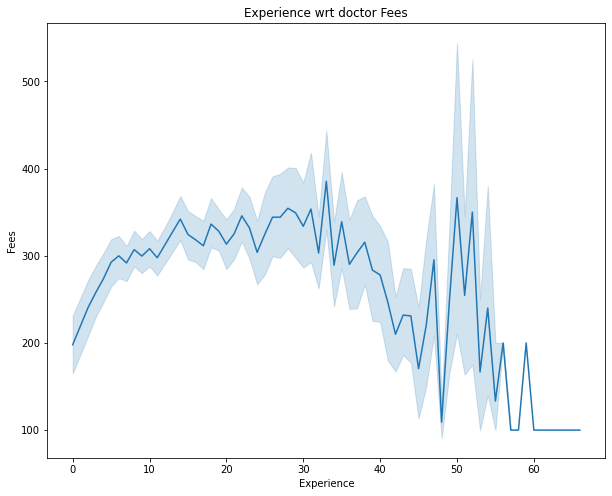

In [35]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=train)
ax.set_title("Experience wrt doctor Fees")
plt.show()

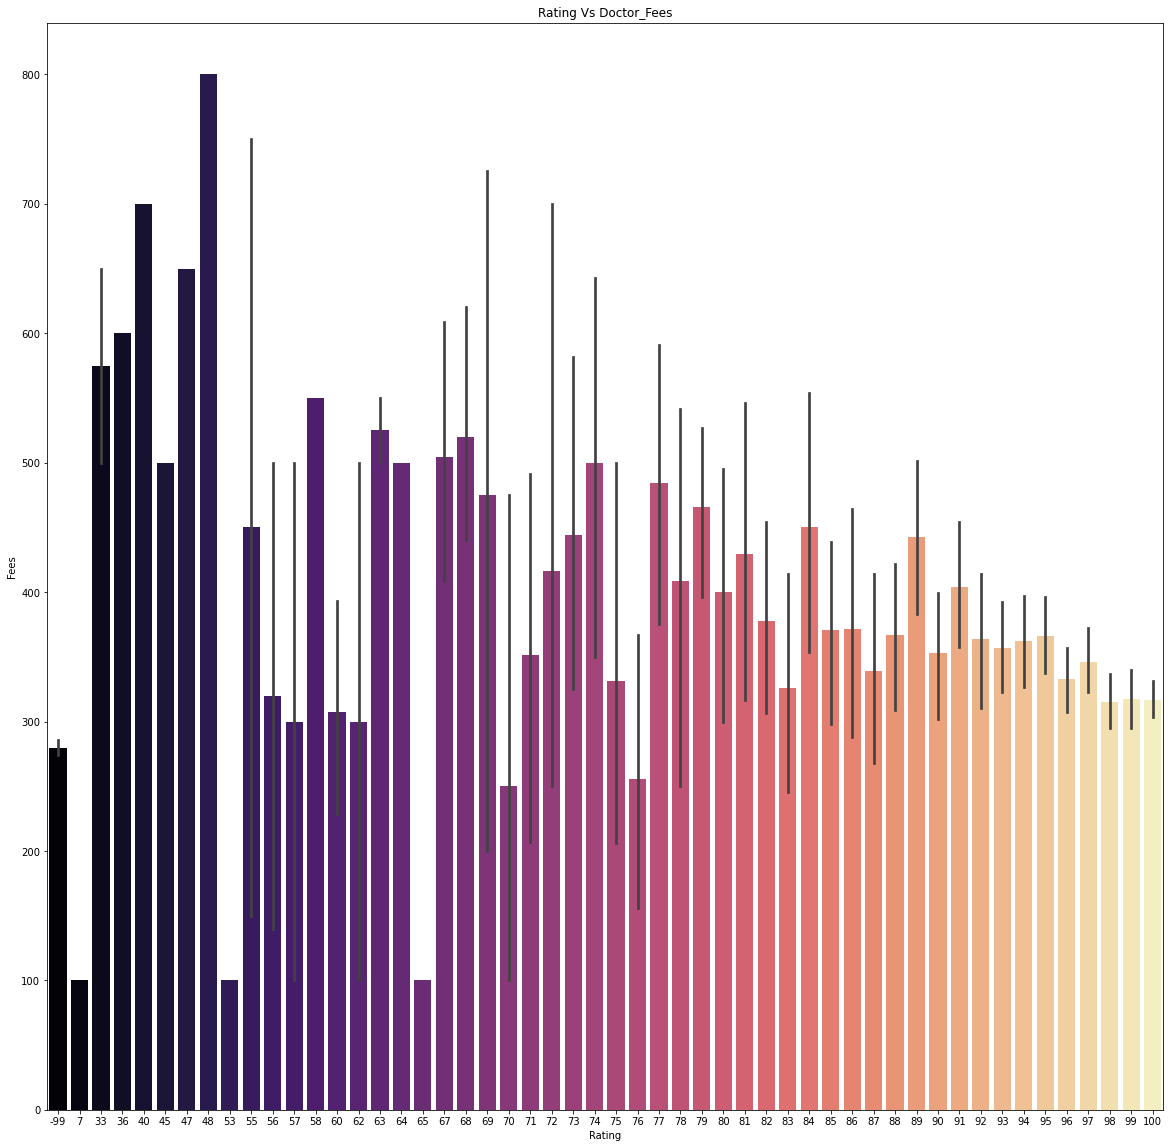

In [38]:
plt.figure(figsize=(20,20))
sns.barplot(x='Rating',y='Fees',data=train,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

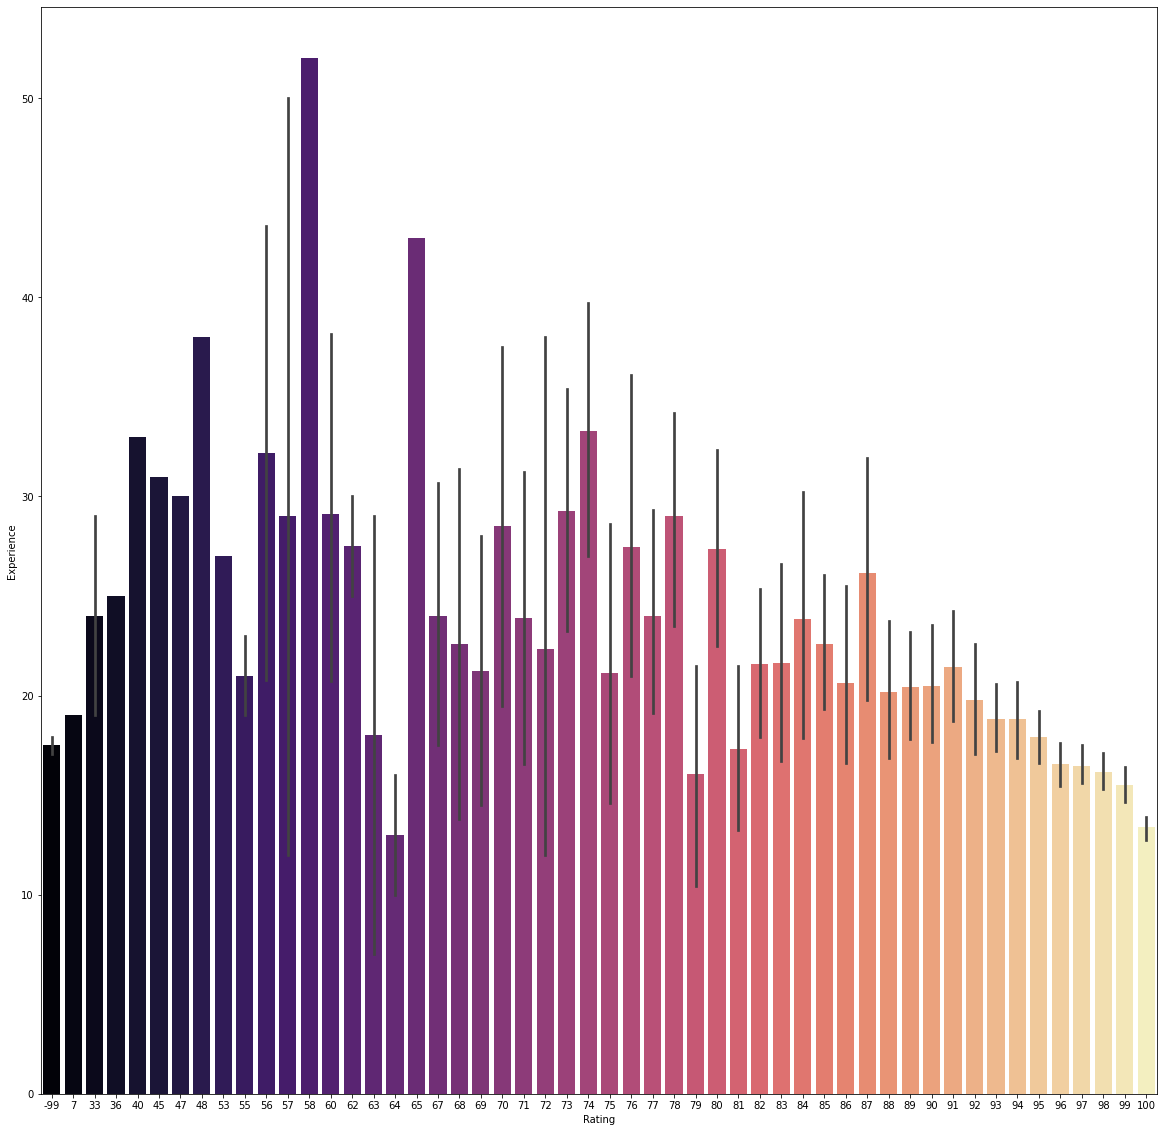

In [40]:
plt.figure(figsize=(20,20))
sns.barplot(x='Rating',y='Experience',data=train,palette='magma')
plt.show()

As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high

In [41]:
train.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12,98,350,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,-99,300,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,-99,250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,100,250,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:

test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

#Place column (Extract city and locality in diff column)
test['Place'].fillna('Unknown,Unknown',inplace=True)
test['locality'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]
#drop place column
test.drop('Place',axis=1,inplace=True)

#Rating column
test['Rating'].fillna('-99%',inplace=True)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)
# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [44]:
# QUALIFICATION COLUMN
# dict of qualification with counts
# HERE the top 10 Qual of train and test col should be same so I am imputing the train col to test col
data = pd.read_excel("C:/Users/hp/Desktop/Dataset/Final Participant Data Folder/Final_Train.xlsx")
data['Qualification'] = data['Qualification'].str.split(",")
Qualification = {}
for x in data['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1
            
# finding out the top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    test[title] = 0

for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            test[c][y] = 1
            
#drop Qualification after getting top 10 qual.
test.drop('Qualification',axis=1,inplace=True)


#city column
test['city'] = test['city'].apply(lambda x: re.sub(' +','',x))

#encode city and profile
test = pd.get_dummies(test, columns=['city','Profile'], prefix=['city','Profile'])

#drop Miscellaneous_Info and locality
test.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

Feature Scalling

In [45]:
x = train.drop('Fees',axis=1)
y = train['Fees']

In [46]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model Building

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [49]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    


scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [50]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [51]:
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7731363409348657
SVR() 0.7942249612057654
DecisionTreeRegressor() 0.6504944668302747
RandomForestRegressor() 0.7640219854789341


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [53]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])


svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)


In [54]:
svm_random.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [55]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.8057000044858077
best_params:
 {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [58]:
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.8046451140086475


RandomGridSearch has the best accuracy for this problem.